In [1]:
import numpy;
import matplotlib.pyplot as plt;

from tensorflow.keras.initializers import TruncatedNormal;

import random;
from tqdm import tqdm;

In [2]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [3]:
class AdalinePSO:

    def __init__(self, feature, label):
        self.feature = feature;
        self.label = label;
        self.num_particles = 50;
        self.iterations = 200;
        self.inertia_factor = 0.5;
        self.cognitive_factor = 0.8;
        self.social_factor = 0.9;

    def initialize_particles(self):
        particles = [];

        position_initializer = TruncatedNormal(mean = 0.5, stddev = 0.02)(shape = (1, 3)).numpy();
        velocity_initializer = TruncatedNormal(mean = 0.5, stddev = 0.02)(shape = (1, 3)).numpy();

        for _ in range(self.num_particles):
            particle = {
                'position': position_initializer[0], # Take 3 data from position_initializer since its shaped (1, 3)
                'velocity': velocity_initializer[0], # Take 3 data from velocity_initializer since its shaped (1, 3)
                'best_position': None,
                'loss': float('inf')
            };
            particles.append(particle);
        
        return particles;

    def forward(self, position):
        predictions = [];

        for i in self.feature:
            prediction = (position[0] * i[0]) + (position[1] * i[1]) + position[2];
            predictions.append(prediction);
        
        mse = numpy.mean((self.label - predictions) ** 2);
        
        return mse

    def update_velocity(self, particle, global_best_position):
        inertia = self.inertia_factor * particle['velocity'];
        cognitive = self.cognitive_factor * random.random() * (particle['best_position'] - particle['position']);
        social = self.social_factor * random.random() * (global_best_position - particle['position']);
        new_velocity = inertia + cognitive + social;
        return new_velocity;

    def update_position(self, particle):
        new_position = particle['position'] + particle['velocity'];
        return new_position;

    def train(self):
        particles = self.initialize_particles();
        global_best_position = None;
        global_loss = float('inf');

        list_iterations = [];
        list_losses = [];

        for iteration in range(self.iterations):
            print(f"Iteration [{iteration + 1} / {self.iterations}] -", end = " ");

            for particle in tqdm(particles):
                loss = self.forward(particle['position']);

                if loss < particle['loss']:
                    particle['loss'] = loss;
                    particle['best_position'] = particle['position'];

                if loss < global_loss:
                    global_loss = loss;
                    global_best_position = particle['position'];

            for particle in particles:
                particle['velocity'] = self.update_velocity(particle, global_best_position);
                particle['position'] = self.update_position(particle);

            list_iterations.append(iteration + 1);
            list_losses.append(global_loss);
            print(f"Best global position / weight as iteration [{iteration + 1}] - weight_x1: {global_best_position[0]} - weight_x2: {global_best_position[1]} - bias: {global_best_position[2]} - loss: {global_loss}\n\n");

        self.weight_x1 = global_best_position[0];
        self.weight_x2 = global_best_position[1];
        self.bias = global_best_position[2];

        print(f"Best weights - weight_x1: {self.weight_x1}, weight_x2: {self.weight_x2}, bias: {self.bias}");

        return list_iterations, list_losses;

In [4]:
model = AdalinePSO(feature, label);
iteration_history, losses_history = model.train();

Iteration [1 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50087.22it/s]


Best global position / weight as iteration [1] - weight_x1: 0.4994300305843353 - weight_x2: 0.4909379184246063 - bias: 0.48342329263687134 - loss: 2.2504525202057954


Iteration [2 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best global position / weight as iteration [2] - weight_x1: 0.4994300305843353 - weight_x2: 0.4909379184246063 - bias: 0.48342329263687134 - loss: 2.2504525202057954


Iteration [3 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24986.92it/s]


Best global position / weight as iteration [3] - weight_x1: 0.4903145730495453 - weight_x2: 0.48103028535842896 - bias: 0.47352495789527893 - loss: 2.2060580825581244


Iteration [4 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25022.69it/s]


Best global position / weight as iteration [4] - weight_x1: 0.3445113003253937 - weight_x2: 0.3225560784339905 - bias: 0.31519925594329834 - loss: 1.604190716002348


Iteration [5 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24989.90it/s]


Best global position / weight as iteration [5] - weight_x1: 0.19143588840961456 - weight_x2: 0.15617775917053223 - bias: 0.1489768624305725 - loss: 1.191521488829606


Iteration [6 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50075.26it/s]


Best global position / weight as iteration [6] - weight_x1: 0.012233048677444458 - weight_x2: -0.03859853744506836 - bias: -0.045616984367370605 - loss: 0.9937289732969312


Iteration [7 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16670.52it/s]


Best global position / weight as iteration [7] - weight_x1: -0.006566867232322693 - weight_x2: -0.05903226137161255 - bias: -0.06603148579597473 - loss: 0.9908149760835753


Iteration [8 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25055.58it/s]


Best global position / weight as iteration [8] - weight_x1: -0.010094277560710907 - weight_x2: -0.0628662109375 - bias: -0.06986190378665924 - loss: 0.9906456104321011


Iteration [9 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24975.01it/s]


Best global position / weight as iteration [9] - weight_x1: -0.014606930315494537 - weight_x2: -0.06777102500200272 - bias: -0.07476212084293365 - loss: 0.9906027685640681


Iteration [10 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24980.96it/s]


Best global position / weight as iteration [10] - weight_x1: -0.014606930315494537 - weight_x2: -0.06777102500200272 - bias: -0.07476212084293365 - loss: 0.9906027685640681


Iteration [11 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24966.10it/s]


Best global position / weight as iteration [11] - weight_x1: -0.013685773126780987 - weight_x2: -0.06676981598138809 - bias: -0.07376185059547424 - loss: 0.9905956618877314


Iteration [12 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16678.48it/s]


Best global position / weight as iteration [12] - weight_x1: -0.01333792507648468 - weight_x2: -0.06639173626899719 - bias: -0.073384128510952 - loss: 0.9905950939234548


Iteration [13 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25028.67it/s]


Best global position / weight as iteration [13] - weight_x1: -0.01333792507648468 - weight_x2: -0.06639173626899719 - bias: -0.073384128510952 - loss: 0.9905950939234548


Iteration [14 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24774.39it/s]


Best global position / weight as iteration [14] - weight_x1: -0.01333792507648468 - weight_x2: -0.06639173626899719 - bias: -0.073384128510952 - loss: 0.9905950939234548


Iteration [15 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [15] - weight_x1: -0.01333792507648468 - weight_x2: -0.06639173626899719 - bias: -0.073384128510952 - loss: 0.9905950939234548


Iteration [16 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50039.42it/s]


Best global position / weight as iteration [16] - weight_x1: -0.01333792507648468 - weight_x2: -0.06639173626899719 - bias: -0.073384128510952 - loss: 0.9905950939234548


Iteration [17 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25061.57it/s]


Best global position / weight as iteration [17] - weight_x1: -0.01333792507648468 - weight_x2: -0.06639173626899719 - bias: -0.073384128510952 - loss: 0.9905950939234548


Iteration [18 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24945.31it/s]


Best global position / weight as iteration [18] - weight_x1: -0.013336604461073875 - weight_x2: -0.06639030575752258 - bias: -0.07338269054889679 - loss: 0.9905950921971421


Iteration [19 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16669.20it/s]


Best global position / weight as iteration [19] - weight_x1: -0.013336604461073875 - weight_x2: -0.06639030575752258 - bias: -0.07338269054889679 - loss: 0.9905950921971421


Iteration [20 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16651.99it/s]


Best global position / weight as iteration [20] - weight_x1: -0.013336604461073875 - weight_x2: -0.06639030575752258 - bias: -0.07338269054889679 - loss: 0.9905950921971421


Iteration [21 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 12492.71it/s]


Best global position / weight as iteration [21] - weight_x1: -0.013336604461073875 - weight_x2: -0.06639030575752258 - bias: -0.07338269054889679 - loss: 0.9905950921971421


Iteration [22 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24986.92it/s]


Best global position / weight as iteration [22] - weight_x1: -0.013336604461073875 - weight_x2: -0.06639030575752258 - bias: -0.07338269054889679 - loss: 0.9905950921971421


Iteration [23 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50027.48it/s]


Best global position / weight as iteration [23] - weight_x1: -0.01333843544125557 - weight_x2: -0.06639229506254196 - bias: -0.07338467240333557 - loss: 0.9905950907504549


Iteration [24 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best global position / weight as iteration [24] - weight_x1: -0.01333843544125557 - weight_x2: -0.06639229506254196 - bias: -0.07338467240333557 - loss: 0.9905950907504549


Iteration [25 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50063.31it/s]


Best global position / weight as iteration [25] - weight_x1: -0.01333843544125557 - weight_x2: -0.06639229506254196 - bias: -0.07338467240333557 - loss: 0.9905950907504549


Iteration [26 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25025.68it/s]


Best global position / weight as iteration [26] - weight_x1: -0.013348628766834736 - weight_x2: -0.06640338152647018 - bias: -0.073395736515522 - loss: 0.9905950885960573


Iteration [27 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25019.71it/s]


Best global position / weight as iteration [27] - weight_x1: -0.013340664096176624 - weight_x2: -0.06639472395181656 - bias: -0.07338708639144897 - loss: 0.9905950881331145


Iteration [28 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24939.37it/s]


Best global position / weight as iteration [28] - weight_x1: -0.013337076641619205 - weight_x2: -0.06639082729816437 - bias: -0.07338318973779678 - loss: 0.9905950875127635


Iteration [29 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25073.55it/s]


Best global position / weight as iteration [29] - weight_x1: -0.013337076641619205 - weight_x2: -0.06639082729816437 - bias: -0.07338318973779678 - loss: 0.9905950875127635


Iteration [30 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49932.19it/s]


Best global position / weight as iteration [30] - weight_x1: -0.013331233523786068 - weight_x2: -0.06638447940349579 - bias: -0.0733768418431282 - loss: 0.9905950866908386


Iteration [31 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50003.62it/s]


Best global position / weight as iteration [31] - weight_x1: -0.013332037255167961 - weight_x2: -0.06638535857200623 - bias: -0.07337771356105804 - loss: 0.9905950854010592


Iteration [32 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24903.84it/s]


Best global position / weight as iteration [32] - weight_x1: -0.013359569944441319 - weight_x2: -0.06641528755426407 - bias: -0.0734076052904129 - loss: 0.9905950846368237


Iteration [33 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24966.10it/s]


Best global position / weight as iteration [33] - weight_x1: -0.013338515534996986 - weight_x2: -0.06639240682125092 - bias: -0.07338473945856094 - loss: 0.9905950817327654


Iteration [34 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49896.55it/s]


Best global position / weight as iteration [34] - weight_x1: -0.013346601277589798 - weight_x2: -0.06640119850635529 - bias: -0.07339351624250412 - loss: 0.9905950804572383


Iteration [35 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24986.92it/s]


Best global position / weight as iteration [35] - weight_x1: -0.013348251581192017 - weight_x2: -0.06640300154685974 - bias: -0.07339530438184738 - loss: 0.9905950780132786


Iteration [36 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25025.68it/s]


Best global position / weight as iteration [36] - weight_x1: -0.013339957222342491 - weight_x2: -0.06639398634433746 - bias: -0.0733862891793251 - loss: 0.9905950757760724


Iteration [37 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [37] - weight_x1: -0.013349554501473904 - weight_x2: -0.06640442460775375 - bias: -0.0733967050909996 - loss: 0.9905950735532211


Iteration [38 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24977.99it/s]


Best global position / weight as iteration [38] - weight_x1: -0.013341584242880344 - weight_x2: -0.06639576703310013 - bias: -0.07338804751634598 - loss: 0.9905950716398926


Iteration [39 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25016.72it/s]


Best global position / weight as iteration [39] - weight_x1: -0.013345892541110516 - weight_x2: -0.0664004534482956 - bias: -0.07339271903038025 - loss: 0.9905950694800256


Iteration [40 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16653.32it/s]


Best global position / weight as iteration [40] - weight_x1: -0.013329966925084591 - weight_x2: -0.06638315320014954 - bias: -0.07337541878223419 - loss: 0.9905950667397714


Iteration [41 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16661.25it/s]


Best global position / weight as iteration [41] - weight_x1: -0.013345127925276756 - weight_x2: -0.06639963388442993 - bias: -0.0733918771147728 - loss: 0.9905950646908084


Iteration [42 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24951.24it/s]


Best global position / weight as iteration [42] - weight_x1: -0.013335184194147587 - weight_x2: -0.06638883054256439 - bias: -0.07338107377290726 - loss: 0.9905950626828814


Iteration [43 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24989.90it/s]


Best global position / weight as iteration [43] - weight_x1: -0.013331704773008823 - weight_x2: -0.06638505309820175 - bias: -0.07337728887796402 - loss: 0.9905950606105487


Iteration [44 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24980.96it/s]


Best global position / weight as iteration [44] - weight_x1: -0.01333191990852356 - weight_x2: -0.06638529151678085 - bias: -0.07337751239538193 - loss: 0.9905950573949391


Iteration [45 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25022.69it/s]


Best global position / weight as iteration [45] - weight_x1: -0.01333011593669653 - weight_x2: -0.06638333201408386 - bias: -0.07337554544210434 - loss: 0.9905950554430643


Iteration [46 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24989.90it/s]


Best global position / weight as iteration [46] - weight_x1: -0.013331407681107521 - weight_x2: -0.06638474017381668 - bias: -0.07337693870067596 - loss: 0.9905950523496916


Iteration [47 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25055.58it/s]


Best global position / weight as iteration [47] - weight_x1: -0.01332849357277155 - weight_x2: -0.06638157367706299 - bias: -0.07337376475334167 - loss: 0.990595050243335


Iteration [48 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16646.71it/s]


Best global position / weight as iteration [48] - weight_x1: -0.013327952474355698 - weight_x2: -0.06638099253177643 - bias: -0.07337316870689392 - loss: 0.9905950470868817


Iteration [49 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 19874.45it/s]


Best global position / weight as iteration [49] - weight_x1: -0.01332742627710104 - weight_x2: -0.06638041883707047 - bias: -0.07337258756160736 - loss: 0.9905950451406325


Iteration [50 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24954.21it/s]


Best global position / weight as iteration [50] - weight_x1: -0.013326935470104218 - weight_x2: -0.06637988984584808 - bias: -0.07337204366922379 - loss: 0.9905950418324405


Iteration [51 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24963.12it/s]


Best global position / weight as iteration [51] - weight_x1: -0.013326596468687057 - weight_x2: -0.06637952476739883 - bias: -0.07337166368961334 - loss: 0.9905950384715012


Iteration [52 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16687.77it/s]


Best global position / weight as iteration [52] - weight_x1: -0.01332479901611805 - weight_x2: -0.06637757271528244 - bias: -0.07336969673633575 - loss: 0.9905950348638217


Iteration [53 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50075.26it/s]


Best global position / weight as iteration [53] - weight_x1: -0.0133260078728199 - weight_x2: -0.0663788914680481 - bias: -0.07337100058794022 - loss: 0.9905950317408239


Iteration [54 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24995.85it/s]


Best global position / weight as iteration [54] - weight_x1: -0.013324812985956669 - weight_x2: -0.06637759506702423 - bias: -0.07336968928575516 - loss: 0.9905950282390256


Iteration [55 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [55] - weight_x1: -0.013324426487088203 - weight_x2: -0.0663771778345108 - bias: -0.07336925715208054 - loss: 0.990595024847034


Iteration [56 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24995.85it/s]


Best global position / weight as iteration [56] - weight_x1: -0.013324116356670856 - weight_x2: -0.06637684255838394 - bias: -0.07336890697479248 - loss: 0.9905950213944146


Iteration [57 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16659.93it/s]


Best global position / weight as iteration [57] - weight_x1: -0.013323929160833359 - weight_x2: -0.06637664139270782 - bias: -0.07336869090795517 - loss: 0.9905950179838543


Iteration [58 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25013.74it/s]


Best global position / weight as iteration [58] - weight_x1: -0.01332339271903038 - weight_x2: -0.06637606024742126 - bias: -0.07336809486150742 - loss: 0.9905950145237397


Iteration [59 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25046.60it/s]


Best global position / weight as iteration [59] - weight_x1: -0.013323348015546799 - weight_x2: -0.06637601554393768 - bias: -0.07336803525686264 - loss: 0.9905950112271882


Iteration [60 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25004.79it/s]


Best global position / weight as iteration [60] - weight_x1: -0.013323050923645496 - weight_x2: -0.06637569516897202 - bias: -0.07336769998073578 - loss: 0.9905950078260365


Iteration [61 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24939.37it/s]


Best global position / weight as iteration [61] - weight_x1: -0.013322960585355759 - weight_x2: -0.06637559831142426 - bias: -0.07336758822202682 - loss: 0.9905950043611754


Iteration [62 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16675.83it/s]


Best global position / weight as iteration [62] - weight_x1: -0.013322676531970501 - weight_x2: -0.06637529283761978 - bias: -0.07336726784706116 - loss: 0.9905950010092703


Iteration [63 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [63] - weight_x1: -0.013322556391358376 - weight_x2: -0.06637516617774963 - bias: -0.07336712628602982 - loss: 0.9905949977107267


Iteration [64 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16657.28it/s]


Best global position / weight as iteration [64] - weight_x1: -0.013322369195520878 - weight_x2: -0.06637496501207352 - bias: -0.0733669102191925 - loss: 0.9905949943031042


Iteration [65 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 14222.80it/s]


Best global position / weight as iteration [65] - weight_x1: -0.01332197804003954 - weight_x2: -0.06637454032897949 - bias: -0.07336646318435669 - loss: 0.9905949889928611


Iteration [66 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 12521.81it/s]


Best global position / weight as iteration [66] - weight_x1: -0.01332169771194458 - weight_x2: -0.06637424230575562 - bias: -0.07336614280939102 - loss: 0.9905949840917894


Iteration [67 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25007.77it/s]


Best global position / weight as iteration [67] - weight_x1: -0.013321490958333015 - weight_x2: -0.06637401878833771 - bias: -0.07336590439081192 - loss: 0.9905949806138811


Iteration [68 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25004.79it/s]


Best global position / weight as iteration [68] - weight_x1: -0.013321133330464363 - weight_x2: -0.06637363880872726 - bias: -0.07336549460887909 - loss: 0.9905949740714475


Iteration [69 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16640.10it/s]


Best global position / weight as iteration [69] - weight_x1: -0.013320822268724442 - weight_x2: -0.0663733035326004 - bias: -0.07336513698101044 - loss: 0.9905949689220477


Iteration [70 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 14207.38it/s]


Best global position / weight as iteration [70] - weight_x1: -0.013320517726242542 - weight_x2: -0.06637297570705414 - bias: -0.07336478680372238 - loss: 0.9905949637975279


Iteration [71 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24992.87it/s]


Best global position / weight as iteration [71] - weight_x1: -0.01332028303295374 - weight_x2: -0.06637272238731384 - bias: -0.07336451858282089 - loss: 0.9905949603576009


Iteration [72 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16667.87it/s]


Best global position / weight as iteration [72] - weight_x1: -0.013320006430149078 - weight_x2: -0.06637243181467056 - bias: -0.07336419820785522 - loss: 0.990594953909284


Iteration [73 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16661.25it/s]


Best global position / weight as iteration [73] - weight_x1: -0.01331956498324871 - weight_x2: -0.06637195497751236 - bias: -0.07336369156837463 - loss: 0.9905949469966743


Iteration [74 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25040.62it/s]


Best global position / weight as iteration [74] - weight_x1: -0.013319289311766624 - weight_x2: -0.06637166440486908 - bias: -0.07336337864398956 - loss: 0.9905949422572631


Iteration [75 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24975.01it/s]


Best global position / weight as iteration [75] - weight_x1: -0.01331894937902689 - weight_x2: -0.06637129932641983 - bias: -0.07336299121379852 - loss: 0.9905949372150497


Iteration [76 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16683.79it/s]


Best global position / weight as iteration [76] - weight_x1: -0.013318711891770363 - weight_x2: -0.06637104600667953 - bias: -0.07336271554231644 - loss: 0.9905949322029968


Iteration [77 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25016.72it/s]


Best global position / weight as iteration [77] - weight_x1: -0.013318479992449284 - weight_x2: -0.06637079268693924 - bias: -0.07336244732141495 - loss: 0.9905949285707059


Iteration [78 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49356.37it/s]


Best global position / weight as iteration [78] - weight_x1: -0.013318270444869995 - weight_x2: -0.06637056916952133 - bias: -0.07336220890283585 - loss: 0.9905949252961319


Iteration [79 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25025.68it/s]


Best global position / weight as iteration [79] - weight_x1: -0.013318030163645744 - weight_x2: -0.06637031584978104 - bias: -0.07336193323135376 - loss: 0.9905949204823279


Iteration [80 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50063.31it/s]


Best global position / weight as iteration [80] - weight_x1: -0.013317937031388283 - weight_x2: -0.06637021154165268 - bias: -0.0733618214726448 - loss: 0.990594918508719


Iteration [81 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50039.42it/s]


Best global position / weight as iteration [81] - weight_x1: -0.013317731209099293 - weight_x2: -0.06636999547481537 - bias: -0.0733615830540657 - loss: 0.9905949136832236


Iteration [82 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50027.48it/s]


Best global position / weight as iteration [82] - weight_x1: -0.013317692093551159 - weight_x2: -0.06636995077133179 - bias: -0.07336153090000153 - loss: 0.9905949117685312


Iteration [83 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24995.85it/s]


Best global position / weight as iteration [83] - weight_x1: -0.013317597098648548 - weight_x2: -0.06636985391378403 - bias: -0.07336141914129257 - loss: 0.9905949086364336


Iteration [84 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50003.62it/s]


Best global position / weight as iteration [84] - weight_x1: -0.013317531906068325 - weight_x2: -0.06636978685855865 - bias: -0.073361337184906 - loss: 0.9905949053370777


Iteration [85 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24948.28it/s]


Best global position / weight as iteration [85] - weight_x1: -0.01331737358123064 - weight_x2: -0.06636961549520493 - bias: -0.07336115092039108 - loss: 0.9905949018371003


Iteration [86 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25022.69it/s]


Best global position / weight as iteration [86] - weight_x1: -0.013317353092133999 - weight_x2: -0.06636960059404373 - bias: -0.0733611211180687 - loss: 0.9905948987692715


Iteration [87 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24995.85it/s]


Best global position / weight as iteration [87] - weight_x1: -0.013317260891199112 - weight_x2: -0.06636949628591537 - bias: -0.07336100935935974 - loss: 0.9905948967307905


Iteration [88 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24983.94it/s]


Best global position / weight as iteration [88] - weight_x1: -0.013317277655005455 - weight_x2: -0.06636952608823776 - bias: -0.07336102426052094 - loss: 0.9905948939361797


Iteration [89 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25019.71it/s]


Best global position / weight as iteration [89] - weight_x1: -0.013317212462425232 - weight_x2: -0.0663694515824318 - bias: -0.07336094230413437 - loss: 0.9905948919269578


Iteration [90 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [90] - weight_x1: -0.013317197561264038 - weight_x2: -0.0663694366812706 - bias: -0.07336091995239258 - loss: 0.9905948902382984


Iteration [91 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49991.70it/s]


Best global position / weight as iteration [91] - weight_x1: -0.0133171696215868 - weight_x2: -0.06636940687894821 - bias: -0.0733608826994896 - loss: 0.9905948885022833


Iteration [92 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24998.83it/s]


Best global position / weight as iteration [92] - weight_x1: -0.013317164033651352 - weight_x2: -0.06636939942836761 - bias: -0.0733608677983284 - loss: 0.9905948866406873


Iteration [93 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16685.11it/s]


Best global position / weight as iteration [93] - weight_x1: -0.013317135162651539 - weight_x2: -0.06636936962604523 - bias: -0.07336083054542542 - loss: 0.9905948849702255


Iteration [94 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50075.26it/s]


Best global position / weight as iteration [94] - weight_x1: -0.013317123055458069 - weight_x2: -0.06636935472488403 - bias: -0.07336080819368362 - loss: 0.990594883084958


Iteration [95 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50063.31it/s]


Best global position / weight as iteration [95] - weight_x1: -0.01331710908561945 - weight_x2: -0.06636933982372284 - bias: -0.07336078584194183 - loss: 0.9905948813307752


Iteration [96 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 12512.84it/s]


Best global position / weight as iteration [96] - weight_x1: -0.01331709697842598 - weight_x2: -0.06636932492256165 - bias: -0.07336076349020004 - loss: 0.9905948794455134


Iteration [97 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 12502.40it/s]


Best global position / weight as iteration [97] - weight_x1: -0.013317091390490532 - weight_x2: -0.06636932492256165 - bias: -0.07336074858903885 - loss: 0.9905948762940118


Iteration [98 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24918.63it/s]


Best global position / weight as iteration [98] - weight_x1: -0.01331708487123251 - weight_x2: -0.06636931747198105 - bias: -0.07336073368787766 - loss: 0.9905948744979663


Iteration [99 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16665.23it/s]


Best global position / weight as iteration [99] - weight_x1: -0.013317077420651913 - weight_x2: -0.06636931002140045 - bias: -0.07336071878671646 - loss: 0.9905948727674628


Iteration [100 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16667.87it/s]


Best global position / weight as iteration [100] - weight_x1: -0.01331707276403904 - weight_x2: -0.06636931002140045 - bias: -0.07336070388555527 - loss: 0.9905948695504223


Iteration [101 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25022.69it/s]


Best global position / weight as iteration [101] - weight_x1: -0.013317071832716465 - weight_x2: -0.06636931002140045 - bias: -0.07336069643497467 - loss: 0.9905948678435907


Iteration [102 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25028.67it/s]


Best global position / weight as iteration [102] - weight_x1: -0.013317067176103592 - weight_x2: -0.06636930257081985 - bias: -0.07336068153381348 - loss: 0.9905948659164661


Iteration [103 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16658.61it/s]


Best global position / weight as iteration [103] - weight_x1: -0.013317063450813293 - weight_x2: -0.06636930257081985 - bias: -0.07336066663265228 - loss: 0.9905948626338862


Iteration [104 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25004.79it/s]


Best global position / weight as iteration [104] - weight_x1: -0.013317057862877846 - weight_x2: -0.06636929512023926 - bias: -0.07336065173149109 - loss: 0.9905948607723043


Iteration [105 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16648.03it/s]


Best global position / weight as iteration [105] - weight_x1: -0.01331705879420042 - weight_x2: -0.06636929512023926 - bias: -0.07336064428091049 - loss: 0.9905948589343914


Iteration [106 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25013.74it/s]


Best global position / weight as iteration [106] - weight_x1: -0.013317054137587547 - weight_x2: -0.06636928766965866 - bias: -0.0733606293797493 - loss: 0.9905948570072697


Iteration [107 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16650.67it/s]


Best global position / weight as iteration [107] - weight_x1: -0.013317051343619823 - weight_x2: -0.06636928766965866 - bias: -0.0733606144785881 - loss: 0.9905948536591508


Iteration [108 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25037.63it/s]


Best global position / weight as iteration [108] - weight_x1: -0.013317050412297249 - weight_x2: -0.06636928766965866 - bias: -0.07336060702800751 - loss: 0.9905948519523209


Iteration [109 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24980.96it/s]


Best global position / weight as iteration [109] - weight_x1: -0.01331704668700695 - weight_x2: -0.06636928021907806 - bias: -0.07336059212684631 - loss: 0.99059484995966


Iteration [110 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16669.20it/s]


Best global position / weight as iteration [110] - weight_x1: -0.013317043893039227 - weight_x2: -0.06636928021907806 - bias: -0.07336057722568512 - loss: 0.9905948466115424


Iteration [111 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [111] - weight_x1: -0.013317042030394077 - weight_x2: -0.06636928021907806 - bias: -0.07336056977510452 - loss: 0.9905948449702544


Iteration [112 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16663.90it/s]


Best global position / weight as iteration [112] - weight_x1: -0.013317041099071503 - weight_x2: -0.06636928021907806 - bias: -0.07336056232452393 - loss: 0.9905948432634254


Iteration [113 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16674.50it/s]


Best global position / weight as iteration [113] - weight_x1: -0.013317038305103779 - weight_x2: -0.06636928021907806 - bias: -0.07336054742336273 - loss: 0.9905948399153088


Iteration [114 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24892.01it/s]


Best global position / weight as iteration [114] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336053997278214 - loss: 0.99059483820848


Iteration [115 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16679.81it/s]


Best global position / weight as iteration [115] - weight_x1: -0.01331703644245863 - weight_x2: -0.06636928021907806 - bias: -0.07336053252220154 - loss: 0.9905948365016516


Iteration [116 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16663.90it/s]


Best global position / weight as iteration [116] - weight_x1: -0.013317032717168331 - weight_x2: -0.06636928021907806 - bias: -0.07336051762104034 - loss: 0.9905948332190775


Iteration [117 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25022.69it/s]


Best global position / weight as iteration [117] - weight_x1: -0.013317031785845757 - weight_x2: -0.06636928021907806 - bias: -0.07336051017045975 - loss: 0.9905948315122493


Iteration [118 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16644.06it/s]


Best global position / weight as iteration [118] - weight_x1: -0.013317031785845757 - weight_x2: -0.06636928021907806 - bias: -0.07336050271987915 - loss: 0.9905948297398799


Iteration [119 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25028.67it/s]


Best global position / weight as iteration [119] - weight_x1: -0.013317030854523182 - weight_x2: -0.06636928021907806 - bias: -0.07336049526929855 - loss: 0.9905948280330521


Iteration [120 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25010.76it/s]


Best global position / weight as iteration [120] - weight_x1: -0.013317030854523182 - weight_x2: -0.06636928021907806 - bias: -0.07336048781871796 - loss: 0.990594826260683


Iteration [121 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24945.31it/s]


Best global position / weight as iteration [121] - weight_x1: -0.013317030854523182 - weight_x2: -0.06636928021907806 - bias: -0.07336048036813736 - loss: 0.990594824488314


Iteration [122 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25007.77it/s]


Best global position / weight as iteration [122] - weight_x1: -0.013317030854523182 - weight_x2: -0.06636928021907806 - bias: -0.07336047291755676 - loss: 0.9905948227159451


Iteration [123 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16663.90it/s]


Best global position / weight as iteration [123] - weight_x1: -0.013317030854523182 - weight_x2: -0.06636928021907806 - bias: -0.07336046546697617 - loss: 0.9905948209435764


Iteration [124 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16666.55it/s]


Best global position / weight as iteration [124] - weight_x1: -0.013317031785845757 - weight_x2: -0.06636928021907806 - bias: -0.07336045801639557 - loss: 0.9905948191056665


Iteration [125 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25016.72it/s]


Best global position / weight as iteration [125] - weight_x1: -0.013317031785845757 - weight_x2: -0.06636928021907806 - bias: -0.07336045056581497 - loss: 0.9905948173332979


Iteration [126 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25016.72it/s]


Best global position / weight as iteration [126] - weight_x1: -0.013317031785845757 - weight_x2: -0.06636928021907806 - bias: -0.07336044311523438 - loss: 0.9905948155609294


Iteration [127 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24933.44it/s]


Best global position / weight as iteration [127] - weight_x1: -0.013317032717168331 - weight_x2: -0.06636928021907806 - bias: -0.07336043566465378 - loss: 0.9905948137230198


Iteration [128 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best global position / weight as iteration [128] - weight_x1: -0.013317032717168331 - weight_x2: -0.06636928021907806 - bias: -0.07336042821407318 - loss: 0.9905948119506517


Iteration [129 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [129] - weight_x1: -0.013317033648490906 - weight_x2: -0.06636928021907806 - bias: -0.07336041331291199 - loss: 0.9905948083403743


Iteration [130 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24954.21it/s]


Best global position / weight as iteration [130] - weight_x1: -0.013317033648490906 - weight_x2: -0.06636928021907806 - bias: -0.07336040586233139 - loss: 0.9905948065680064


Iteration [131 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [131] - weight_x1: -0.01331703457981348 - weight_x2: -0.06636928021907806 - bias: -0.0733603984117508 - loss: 0.9905948047300972


Iteration [132 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24972.04it/s]


Best global position / weight as iteration [132] - weight_x1: -0.01331703457981348 - weight_x2: -0.06636928021907806 - bias: -0.0733603909611702 - loss: 0.9905948029577295


Iteration [133 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25049.59it/s]


Best global position / weight as iteration [133] - weight_x1: -0.01331703457981348 - weight_x2: -0.06636928021907806 - bias: -0.0733603835105896 - loss: 0.990594801185362


Iteration [134 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24957.18it/s]


Best global position / weight as iteration [134] - weight_x1: -0.013317035511136055 - weight_x2: -0.06636928021907806 - bias: -0.073360376060009 - loss: 0.9905947993474532


Iteration [135 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24972.04it/s]


Best global position / weight as iteration [135] - weight_x1: -0.013317035511136055 - weight_x2: -0.06636928021907806 - bias: -0.0733603686094284 - loss: 0.990594797575086


Iteration [136 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24977.99it/s]


Best global position / weight as iteration [136] - weight_x1: -0.013317035511136055 - weight_x2: -0.06636928021907806 - bias: -0.07336036115884781 - loss: 0.9905947958027188


Iteration [137 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25043.61it/s]

Best global position / weight as iteration [137] - weight_x1: -0.01331703644245863 - weight_x2: -0.06636928021907806 - bias: -0.07336035370826721 - loss: 0.9905947939648101


Iteration [138 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 25004.79it/s]


Best global position / weight as iteration [138] - weight_x1: -0.01331703644245863 - weight_x2: -0.06636928021907806 - bias: -0.07336034625768661 - loss: 0.9905947921924432


Iteration [139 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25067.56it/s]


Best global position / weight as iteration [139] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336033880710602 - loss: 0.9905947903545348


Iteration [140 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24924.55it/s]


Best global position / weight as iteration [140] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336033135652542 - loss: 0.990594788582168


Iteration [141 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16706.38it/s]


Best global position / weight as iteration [141] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336032390594482 - loss: 0.9905947868098013


Iteration [142 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16665.23it/s]


Best global position / weight as iteration [142] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336031645536423 - loss: 0.9905947850374347


Iteration [143 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [143] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336030900478363 - loss: 0.9905947832650682


Iteration [144 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25010.76it/s]


Best global position / weight as iteration [144] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336030155420303 - loss: 0.9905947814927021


Iteration [145 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16658.61it/s]


Best global position / weight as iteration [145] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336029410362244 - loss: 0.9905947797203358


Iteration [146 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24986.92it/s]


Best global position / weight as iteration [146] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336028665304184 - loss: 0.9905947779479697


Iteration [147 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16667.87it/s]


Best global position / weight as iteration [147] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336027920246124 - loss: 0.9905947761756037


Iteration [148 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16659.93it/s]


Best global position / weight as iteration [148] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336027175188065 - loss: 0.9905947744032376


Iteration [149 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 20622.99it/s]


Best global position / weight as iteration [149] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336026430130005 - loss: 0.9905947726308719


Iteration [150 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 9997.39it/s]

Best global position / weight as iteration [150] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336025685071945 - loss: 0.9905947708585062




Iteration [151 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24972.04it/s]


Best global position / weight as iteration [151] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336024940013885 - loss: 0.9905947690861407


Iteration [152 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16655.96it/s]


Best global position / weight as iteration [152] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336024194955826 - loss: 0.9905947673137753


Iteration [153 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 33083.33it/s]


Best global position / weight as iteration [153] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336024194955826 - loss: 0.9905947673137753


Iteration [154 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25007.77it/s]


Best global position / weight as iteration [154] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336023449897766 - loss: 0.9905947655414098


Iteration [155 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24966.10it/s]


Best global position / weight as iteration [155] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336022704839706 - loss: 0.9905947637690447


Iteration [156 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25034.64it/s]


Best global position / weight as iteration [156] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336022704839706 - loss: 0.9905947637690447


Iteration [157 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16671.85it/s]


Best global position / weight as iteration [157] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336021959781647 - loss: 0.9905947619966795


Iteration [158 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24933.44it/s]


Best global position / weight as iteration [158] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336021959781647 - loss: 0.9905947619966795


Iteration [159 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25043.61it/s]


Best global position / weight as iteration [159] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336021214723587 - loss: 0.9905947602243144


Iteration [160 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best global position / weight as iteration [160] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336020469665527 - loss: 0.9905947584519496


Iteration [161 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24827.18it/s]


Best global position / weight as iteration [161] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336019724607468 - loss: 0.9905947566795847


Iteration [162 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25052.59it/s]

Best global position / weight as iteration [162] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336018979549408 - loss: 0.9905947549072202




Iteration [163 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16470.21it/s]


Best global position / weight as iteration [163] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336017489433289 - loss: 0.9905947513624911


Iteration [164 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24954.21it/s]


Best global position / weight as iteration [164] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336016744375229 - loss: 0.9905947495901266


Iteration [165 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24966.10it/s]


Best global position / weight as iteration [165] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.0733601525425911 - loss: 0.9905947460453983


Iteration [166 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25046.60it/s]


Best global position / weight as iteration [166] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.0733601450920105 - loss: 0.9905947442730344


Iteration [167 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25016.72it/s]


Best global position / weight as iteration [167] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.0733601376414299 - loss: 0.9905947425006705


Iteration [168 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25037.63it/s]


Best global position / weight as iteration [168] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336012274026871 - loss: 0.990594738955943


Iteration [169 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24995.85it/s]


Best global position / weight as iteration [169] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336011528968811 - loss: 0.9905947371835795


Iteration [170 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 21465.22it/s]


Best global position / weight as iteration [170] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336010783910751 - loss: 0.990594735411216


Iteration [171 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25001.81it/s]


Best global position / weight as iteration [171] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336010038852692 - loss: 0.9905947336388525


Iteration [172 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50075.26it/s]


Best global position / weight as iteration [172] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336009293794632 - loss: 0.9905947318664894


Iteration [173 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16175.49it/s]


Best global position / weight as iteration [173] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336008548736572 - loss: 0.9905947300941262


Iteration [174 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25019.71it/s]


Best global position / weight as iteration [174] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336007803678513 - loss: 0.9905947283217633


Iteration [175 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25019.71it/s]


Best global position / weight as iteration [175] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336007058620453 - loss: 0.9905947265494003


Iteration [176 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24998.83it/s]


Best global position / weight as iteration [176] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336006313562393 - loss: 0.9905947247770376


Iteration [177 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24983.94it/s]


Best global position / weight as iteration [177] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336005568504333 - loss: 0.9905947230046748


Iteration [178 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24969.07it/s]


Best global position / weight as iteration [178] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336004823446274 - loss: 0.9905947212323123


Iteration [179 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16622.95it/s]


Best global position / weight as iteration [179] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336004078388214 - loss: 0.9905947194599498


Iteration [180 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50099.19it/s]


Best global position / weight as iteration [180] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336003333330154 - loss: 0.9905947176875874


Iteration [181 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16689.10it/s]


Best global position / weight as iteration [181] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336002588272095 - loss: 0.9905947159152253


Iteration [182 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24912.71it/s]


Best global position / weight as iteration [182] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336001843214035 - loss: 0.9905947141428632


Iteration [183 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25040.62it/s]


Best global position / weight as iteration [183] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336001098155975 - loss: 0.9905947123705011


Iteration [184 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49991.70it/s]


Best global position / weight as iteration [184] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07336000353097916 - loss: 0.9905947105981392


Iteration [185 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24992.87it/s]


Best global position / weight as iteration [185] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335999608039856 - loss: 0.9905947088257774


Iteration [186 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25004.79it/s]


Best global position / weight as iteration [186] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335998862981796 - loss: 0.9905947070534157


Iteration [187 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16678.48it/s]


Best global position / weight as iteration [187] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335998117923737 - loss: 0.9905947052810541


Iteration [188 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 7144.10it/s]


Best global position / weight as iteration [188] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335997372865677 - loss: 0.9905947035086926


Iteration [189 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24942.34it/s]


Best global position / weight as iteration [189] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335996627807617 - loss: 0.9905947017363312


Iteration [190 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49778.12it/s]


Best global position / weight as iteration [190] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335995882749557 - loss: 0.99059469996397


Iteration [191 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 12513.59it/s]


Best global position / weight as iteration [191] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335995137691498 - loss: 0.990594698191609


Iteration [192 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 16667.87it/s]


Best global position / weight as iteration [192] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335994392633438 - loss: 0.9905946964192478


Iteration [193 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24966.10it/s]


Best global position / weight as iteration [193] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335993647575378 - loss: 0.990594694646887


Iteration [194 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25034.64it/s]


Best global position / weight as iteration [194] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335993647575378 - loss: 0.990594694646887


Iteration [195 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25010.76it/s]


Best global position / weight as iteration [195] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335992902517319 - loss: 0.9905946928745262


Iteration [196 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24989.90it/s]


Best global position / weight as iteration [196] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.07335992157459259 - loss: 0.9905946911021655


Iteration [197 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25049.59it/s]


Best global position / weight as iteration [197] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.073359914124012 - loss: 0.990594689329805


Iteration [198 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25010.76it/s]


Best global position / weight as iteration [198] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.0733599066734314 - loss: 0.9905946875574445


Iteration [199 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24972.04it/s]


Best global position / weight as iteration [199] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.0733598992228508 - loss: 0.9905946857850841


Iteration [200 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24986.92it/s]

Best global position / weight as iteration [200] - weight_x1: -0.013317037373781204 - weight_x2: -0.06636928021907806 - bias: -0.0733598917722702 - loss: 0.9905946840127239


Best weights - weight_x1: -0.013317037373781204, weight_x2: -0.06636928021907806, bias: -0.0733598917722702


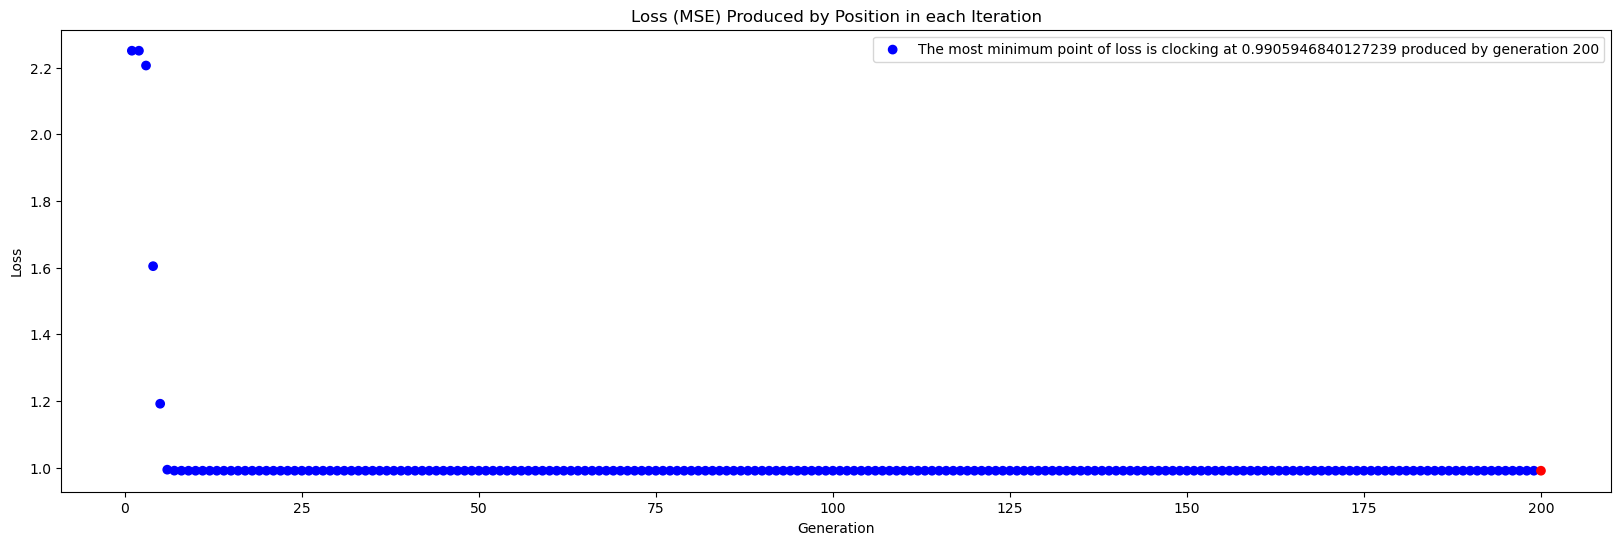

In [5]:
import matplotlib.pyplot as plt;

plt.figure(figsize = (20, 6));

# Get the most minimum loss
minimum_loss = min(losses_history);
index_of_most_minimum_loss = losses_history.index(minimum_loss);

color = ["red" if loss == minimum_loss else "blue" for loss in losses_history];

plt.scatter(iteration_history, losses_history, label = "Loss", marker = "o", color = color);
plt.title("Loss (MSE) Produced by Position in each Iteration");
plt.xlabel("Generation");
plt.ylabel("Loss");
plt.legend([f"The most minimum point of loss is clocking at {minimum_loss} produced by generation {iteration_history[index_of_most_minimum_loss]}"]);

plt.show();